<a href="https://colab.research.google.com/github/mariana-otero/Data_Estadistica_2/blob/master/Notebook_EDA_en_HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Exploratorio de Datos en Recursos Humanos**

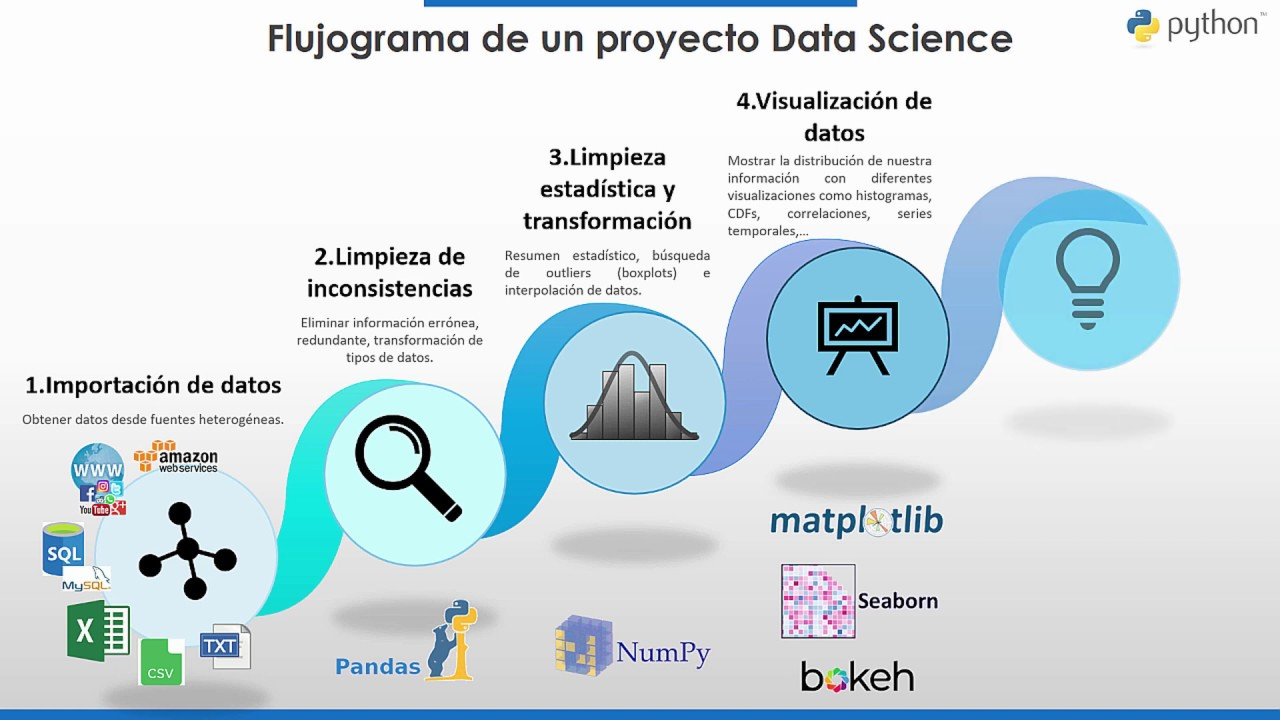

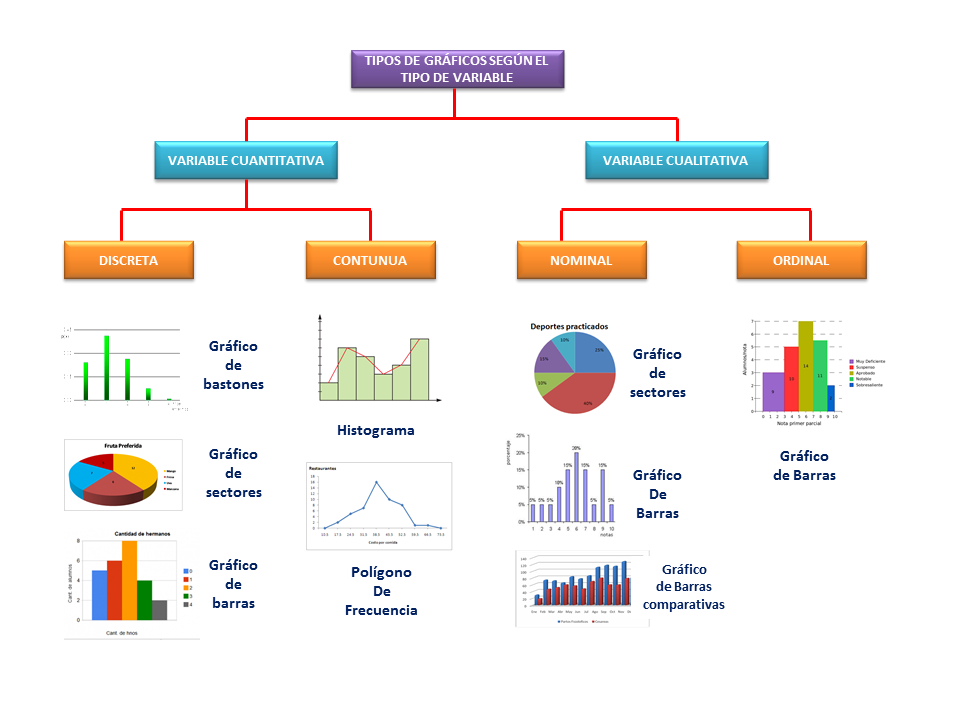

In [ ]:
!pip install pandas # instalación de librerías

In [ ]:
# Importación de las librerías

import numpy as np # numpy es una librería de python para poder trabajar con operaciones matematicas
import pandas as pd # pandas sirve para poder trabajar con estructuras de datos (columnas (listas, series), dataframe)
import seaborn as sns # seaborn sirve para poder trabajar con graficos
import matplotlib.pyplot as plt # matplotlib sirve para poder trabajar con graficos
import io # es una librería de complemento para poder realizar la carga de datos

In [ ]:
# ruta , usuario, contraseña, codigos de python de conexion a la plataforma (One drive)

In [ ]:
from google.colab import files # google.colab es una libreria exclusiva de Colab, files es un modulo para carga de archivos

In [ ]:
uploaded = files.upload() # upload es una función de la libreria files que es la que te conecta directamente con el archivo a cargar

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


In [ ]:
# Dataframe es una estructura de datos (tabla que contiene filas y columnas)

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded["HR_comma_sep (1).csv"]),encoding="latin-1", sep=",") #pd.read_csv(io.BytesIO())

In [ ]:
data.head(8) # head - primeras, tail - ultimas, sample - muestra

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low


In [ ]:
# y : variable dependiente (objetivo, target)
# Xs (X1, X2, X3, X4, X5,....) : variables independientes (covariables, cofactores, factores)

# Problema : Un alto numero de colaboradores abandonando la empresa
# Objetivos : 1. Conocer las causas por las que un colaborador puede fugar de la empresa (Descriptivo)
#.            2. Desarrollar un modelo de ML (Clasificacion) para predecir los usuarios potenciales a irse (Predictivo)

# y : left (colaborador fuga o no fuga de la empresa 1-si, 0-no)
# Xs : son todas las variables menos left

In [ ]:
# Modelos de clasificacion

# 1. INPUT

# y : left (colaborador fuga o no fuga de la empresa 1-si, 0-no)
# Xs : son todas las variables menos left

# 2.  ENTRENAR EL MODELO

#    2.1. Particionar la data (80% Train, 20% Test)
#         Train (X_train, y_train) y Test (X_test, y_test)

#.   2.2. Algoritmo entrena con el X_train, y_train

#.   2.3. Validar tu algoritmo con el X_test, y_test

# 3.  PREDICCIONES

#.   3.1 Todos los modelos de clasificacion entregan como resultado inicial probabilidades (entre 0 a 1)
#.   3.2 Convertir esas probabilidades a una de las categorias originales (Fuga / No Fugar)
#.       Todos los usuarios que tengan prob. menor o igual a 0.5 va a ser clasificados como NO FUGA
#.       Todos los usuarios que tengan prob. mayor a 0.5 van a ser clasficados como FUGA
#.   3.3 Estrategias de Retencion
#.       a. Colaboradores con prob. de 0.8 a 1 -> COLABORADORES CON ALTA PROB. DE irse
#        b. 0.5 a 0.8 COL. CON MEDIANA PROB. DE IRSE, <0.5 COLABORADORES QUE NO SE IRAN



In [ ]:
# Aprendizaje Supervisado :

# Es un aprendizaje del ML que se utiliza para poder resolver problemas donde se tiene identificada una
# variable dependiente (Fuga del colaborador)
# Fuga (Si Fuga 1 o No Fuga 0) es una variable cualitativa dicotomica
# Estimar Y en funcion de variables Xs

# AS. Regresión
# Se utiliza cuando mi variable dependiente es de tipo cuantitativa (Precios de viviendas)

# AS. Clasificacion
# Se utiliza cuando mi variable dependiente es de tipo cualitativa (Si No)

In [ ]:
# Aprendizaje Supervisado:

# Paso 1. Realizar el analisis descriptivo / exploratorio de los datos (EDA)
#         Entender si existe relaciones entre variables independientes vs la dependiente

# Paso 2. Realizar el modelo de machine learning

In [ ]:
data.columns.to_list() # columns funcion que te genera una lista con los nombres de las variables

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [ ]:
data.info() # info es una función para tener un resumen de las caracteristicas de mi base datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# ¿Cómo renombrar el nombre de la columna sale por department?

data.rename(columns={"sales":"department"}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* **satisfaction level**
* **last evaluation**: Score achived in the last evaluation
* **number project:** Number of proyects assign to the employee
* **average monthy hours**: Average of hours worked per month.
* **time spend company** How years the worker has worked in the company
* **Work accident**: Did the employe suffer an accident? (1 = yes, 0 = No)
* **promotion last 5years**: Did the employee has a promotion in the last 5 years? (1 = yes, 0 = no)
* **sales**: Department where the employee works. Categorical [marketing, support, sales, technical, management, accounting, product_mng, IT, hr]
* **salary**: Salary Level, Categorical variable [high, medium, low]
* **left**: Did the employee left the company?. Categorical variable [1 = yes, 0 = no]

We can see that there are 8 numerical variables and 2 categorical, but we know that 'Work_accident', 'left', 'promotion_last_5years' are binary variables, so, actually, they are categorical variables. Salary has an order, so I think can be useful to have a numeric version of this variable.

In [ ]:
#¿Cómo poner el tipo de formato de variable correcto?

data['promotion_last_5years'] = data['promotion_last_5years'].astype('object') # data["name"].astype("correct_variable") object, int float64
data['Work_accident'] = data['Work_accident'].astype('object')
data['left'] = data['left'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  object 
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [ ]:
data.describe() # describe() que es una función para generar estadisticas descriptivas rapidas

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


- Most employees (%75) have been working in the company between 2 and 4 years.
- Only 25% of employees are highly satisfied  (+0.81)
- On average, people work 201 hours monthly, 50% of them work more than 200 hours and the rest 50% less than 200 hours.
- Each employee has 4 projects on average..
- On average,  last evaluation results are 0.7,  25% of evaluations are over 0.87 other 25% under 0.56 and over 0.36

In [ ]:
data.describe(include=['O']) # describe(include=["O"]) Object formato de variable categorica en python

,Work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


# **Análisis Univariado**

In [ ]:
data["left"].value_counts() # frecuencias de las categorias de una variable categorica

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
data["left"].value_counts(normalize = True) *100

0    76.191746
1    23.808254
Name: left, dtype: float64

In [ ]:
# Balanceo de datos

# Data desbalanceada : cuando las diferencias entre categorias estan por encima de un 66.6 % y 33.3%
# Problematica : El modelo va a aprender más de los colaboradores que no fugaron (76%)
# Si tenemos un problema de fuga, el algoritmo debe aprender bien sobre todo de los que si fugaron (24%)

# Aplicar el balanceo de datos : igualar la cantidad de registros de los que fugaron y de los que no fugaron

# SMOTE y ADASYN


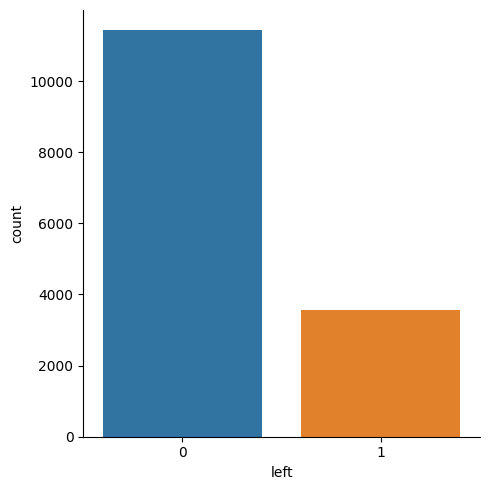

In [ ]:
sns.catplot(x ='left', kind='count', data=data) # seaborn (sns) categorical plot

In [ ]:
# ¿Cuántos colaboradores trabajan en cada área de la empresa?

data["department"].value_counts(normalize=True)*100

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: department, dtype: float64

In [ ]:
# ¿Cuál es la mayor categoría salarial en mi base de datos? ¿En que %? "salary"

data["salary"].value_counts(normalize=True)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

<Axes: xlabel='satisfaction_level'>

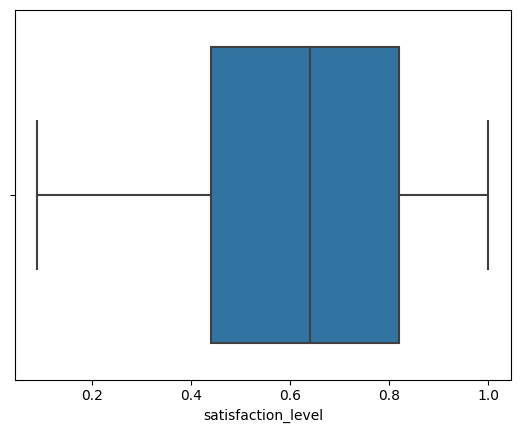

In [ ]:
# Nivel de satisfacción
sns.boxplot(x="satisfaction_level", data=data) # seaborn .boxplot() Metodo de Tukey

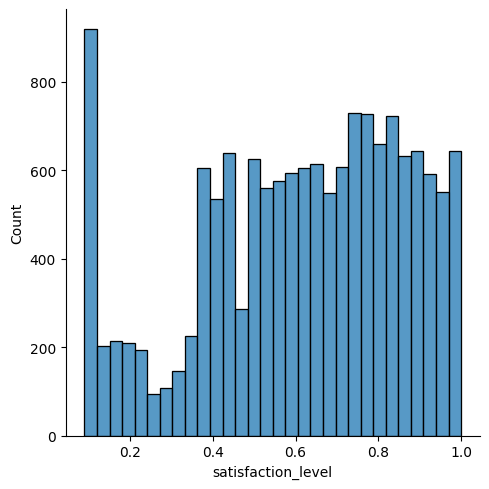

In [ ]:
sns.displot(data["satisfaction_level"]) #histograma

<Axes: xlabel='satisfaction_level', ylabel='Count'>

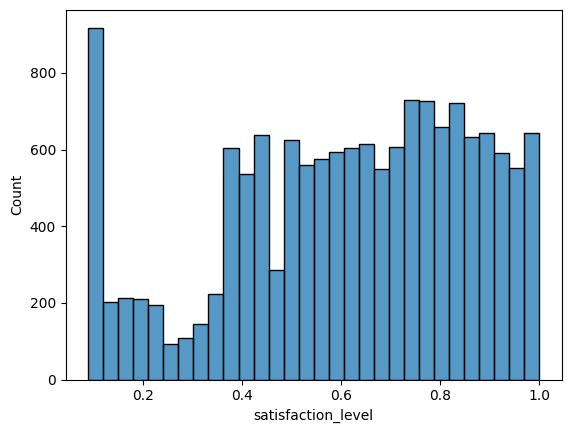

In [ ]:
sns.histplot(data["satisfaction_level"]) #displot como histplot te permiten hacer histogramas en Seaborn

<Axes: xlabel='last_evaluation'>

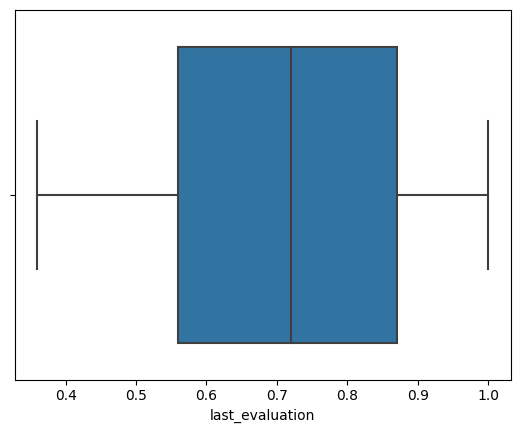

In [ ]:
sns.boxplot(x="last_evaluation", data=data)

<Axes: xlabel='number_project'>

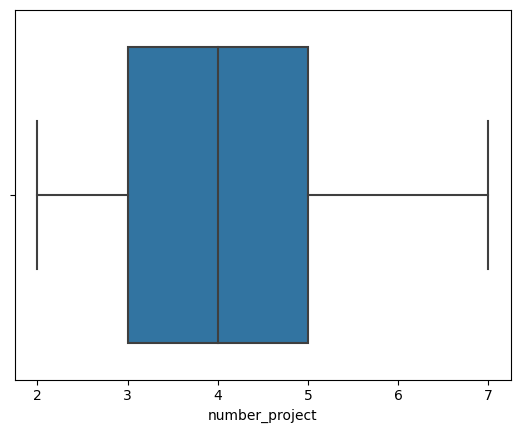

In [ ]:
sns.boxplot(x="number_project", data=data)

<Axes: xlabel='average_montly_hours'>

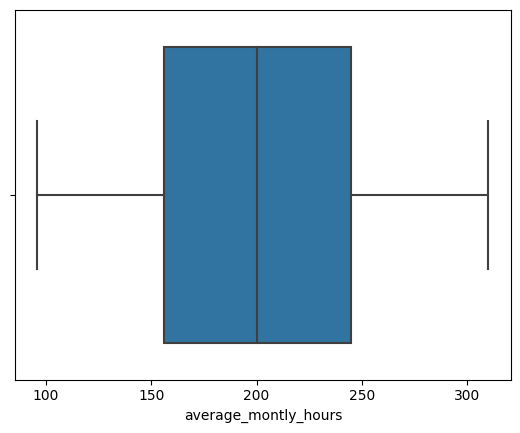

In [ ]:
sns.boxplot(x="average_montly_hours", data=data)

<Axes: xlabel='time_spend_company'>

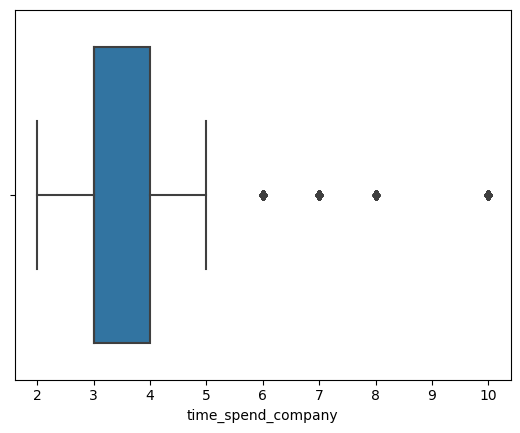

In [ ]:
sns.boxplot(x="time_spend_company", data=data)

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'number_project'}>,
        <Axes: title={'center': 'average_montly_hours'}>],
       [<Axes: title={'center': 'time_spend_company'}>, <Axes: >]],
      dtype=object)

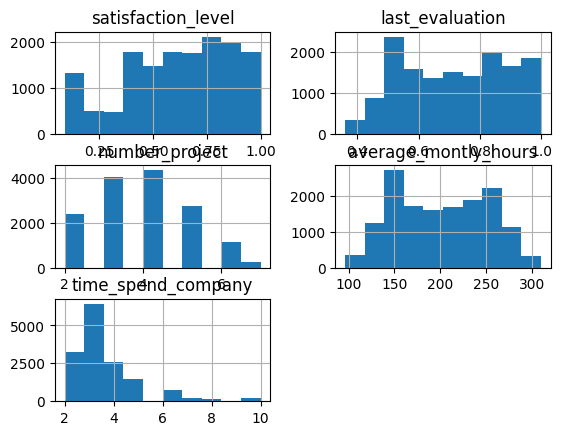

In [ ]:
data.hist() # hist es una función propia de python la cual te genera de manera masiva histogramas para todas tus variables cuantitativas

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'number_project'}>,
        <Axes: title={'center': 'average_montly_hours'}>],
       [<Axes: title={'center': 'time_spend_company'}>, <Axes: >]],
      dtype=object)

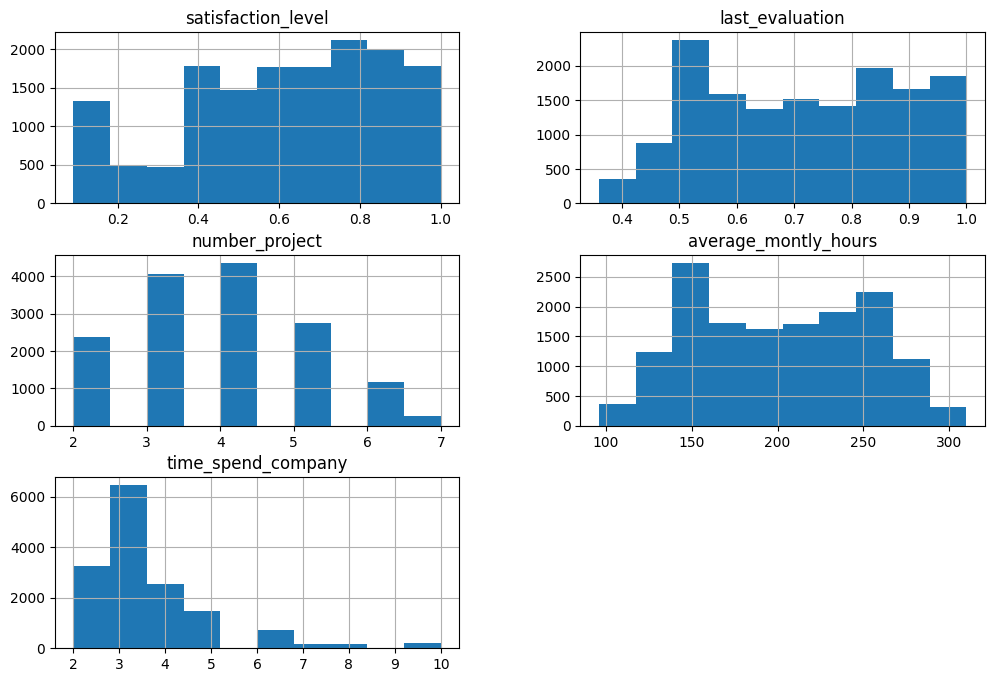

In [ ]:
data.hist(figsize = (12,8)) # figsize permite reconfigurar las dimensiones de mis graficas

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'number_project'}>,
        <Axes: title={'center': 'average_montly_hours'}>],
       [<Axes: title={'center': 'time_spend_company'}>, <Axes: >]],
      dtype=object)

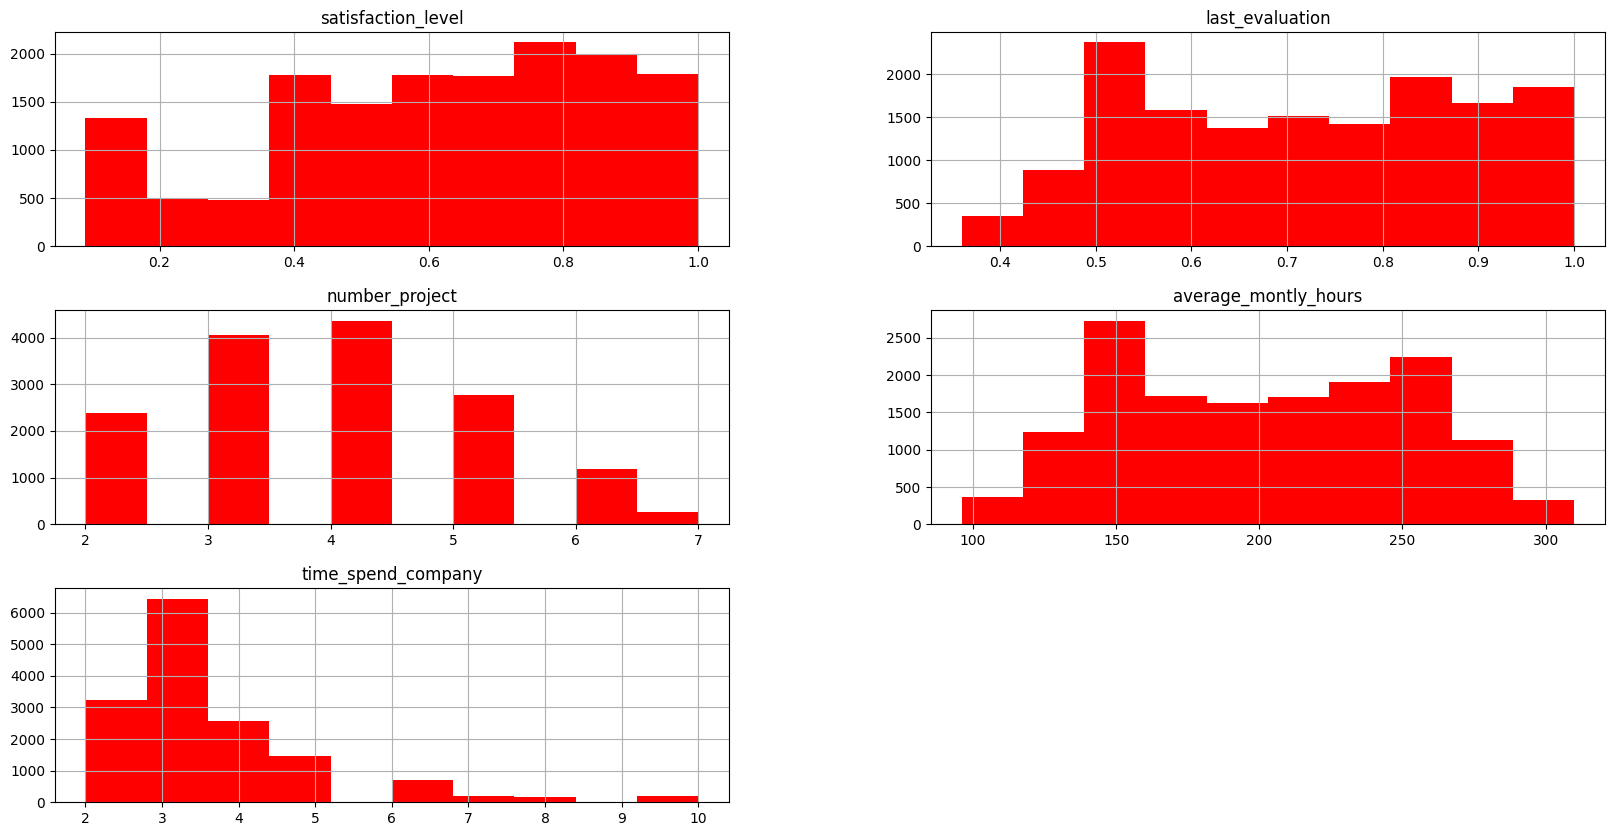

In [ ]:
data.hist(figsize = (20,10), color = 'r')

# **Análisis Multivariado**

In [ ]:
# Si mi variable dependiente es categorica: (FUGA O NO FUGA)

# Y mi variable independiente es cuantitativa -> es analizar graficamente la relacion, comparar promedios de las categoria de la var. cualitativa
# Y mi variable independiente es cualitativa -> es analizar graficamente la relacion


# Si mi variable dependiente es cuantitativa:

# Y mi variable independiente es cuantitativa -> analizar graficamente y calcular el coeficiente de correlacion de pearson
# Y mi variable independiente es cualitativa -> analizar graficacmente la relacion y comparar promedios de las categorias

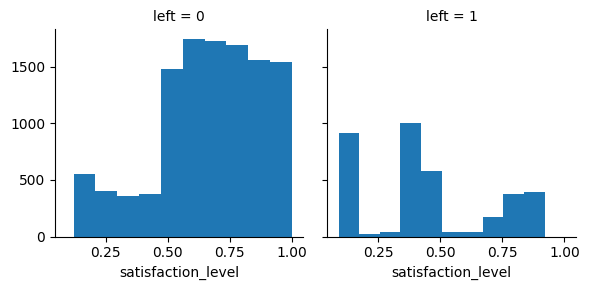

In [ ]:
# Este codigo me sirve para entender si hay relacion entre una variable categorica y una variable cuantitativa
g = sns.FacetGrid(data, col='left') # Seaborn (sns) - FacetGrid generar un grafico para cada categoria de tu variable (0 no y 1 si)
g.map(plt.hist, 'satisfaction_level') # map, import matplotlib.pyplot as plt

<Axes: xlabel='left', ylabel='satisfaction_level'>

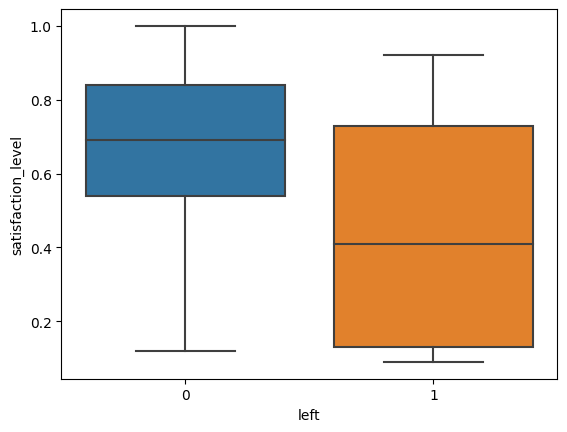

In [ ]:
sns.boxplot(x='left',y='satisfaction_level',data=data)

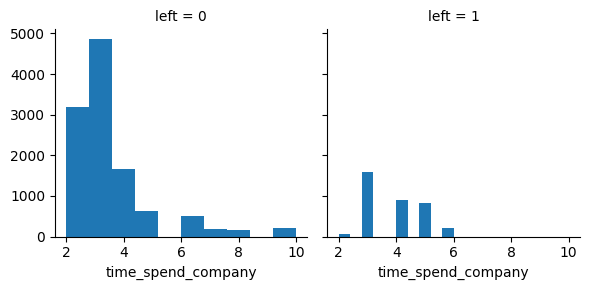

In [ ]:
g = sns.FacetGrid(data, col='left')
g.map(plt.hist, 'time_spend_company')

<Axes: xlabel='left', ylabel='time_spend_company'>

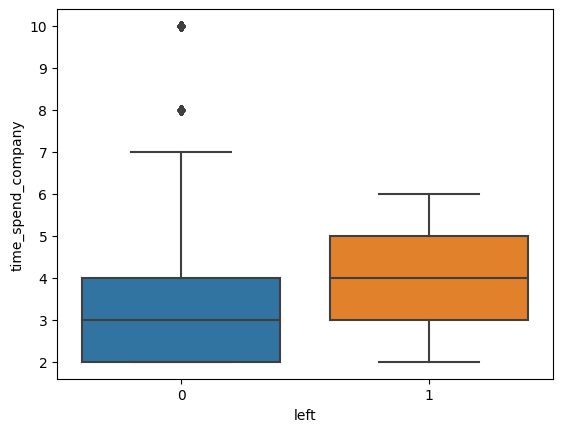

In [ ]:
sns.boxplot(x='left',y='time_spend_company',data=data)

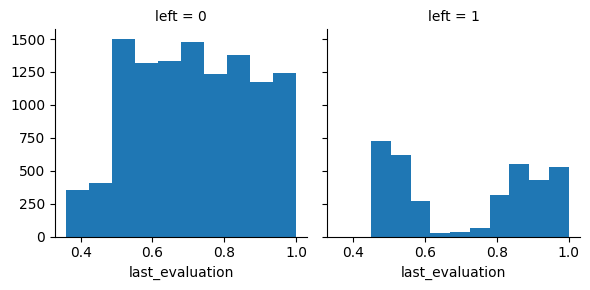

In [ ]:
g = sns.FacetGrid(data, col='left')
g.map(plt.hist, 'last_evaluation')


<Axes: xlabel='left', ylabel='last_evaluation'>

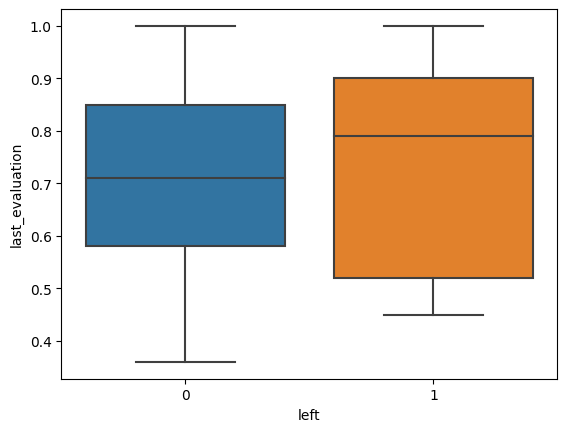

In [ ]:
sns.boxplot(x='left',y='last_evaluation',data=data)

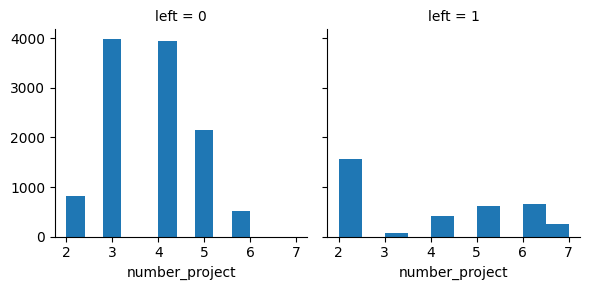

In [ ]:
g = sns.FacetGrid(data, col='left')
g.map(plt.hist, 'number_project')


<Axes: xlabel='left', ylabel='number_project'>

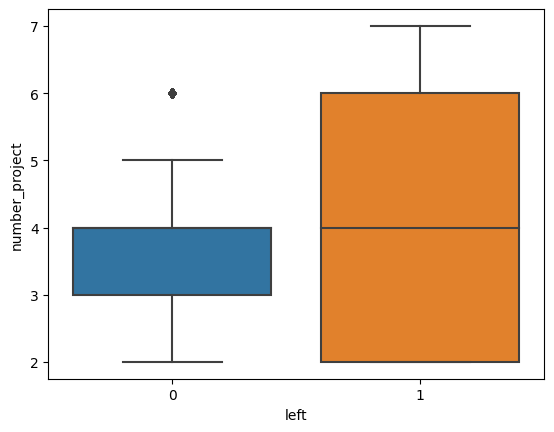

In [ ]:
sns.boxplot(x='left',y='number_project',data=data)

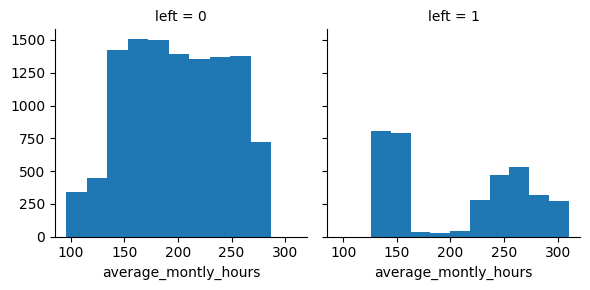

In [ ]:
g = sns.FacetGrid(data, col='left')
g.map(plt.hist, 'average_montly_hours')


<Axes: xlabel='left', ylabel='average_montly_hours'>

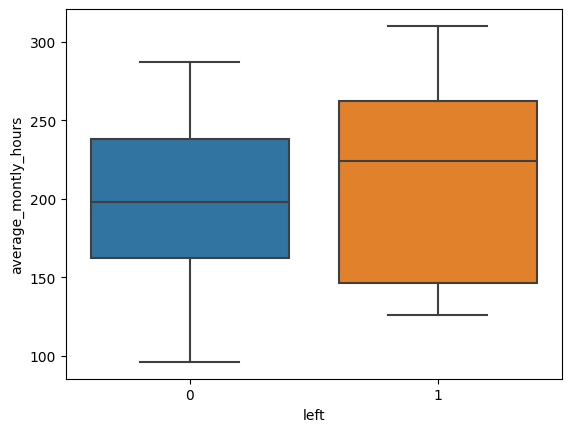

In [ ]:
sns.boxplot(x='left',y='average_montly_hours',data=data)

¿No sería mejor si complementamos esas gráficas con valores exactos como la media o mediana?

In [ ]:
data.groupby("left").mean() # groupby es una funcion que busca hacer agrupaciones, dejandote tablas similares a las que puedes obtener en una tabla dinamica

<ipython-input-49-cf03d76c5305>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("left").mean() # groupby es una funcion que busca hacer agrupaciones, dejandote tablas similares a las que puedes obtener en una tabla dinamica


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
left,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032
1,0.440098,0.718113,3.855503,207.419210,3.876505


In [ ]:
data.groupby("left").median()

<ipython-input-50-139d5e53bc2c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("left").median()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
left,,,,,
0,0.69,0.71,4.0,198.0,3.0
1,0.41,0.79,4.0,224.0,4.0


¿Y se puede graficar relaciones entre variables cuantitativas?

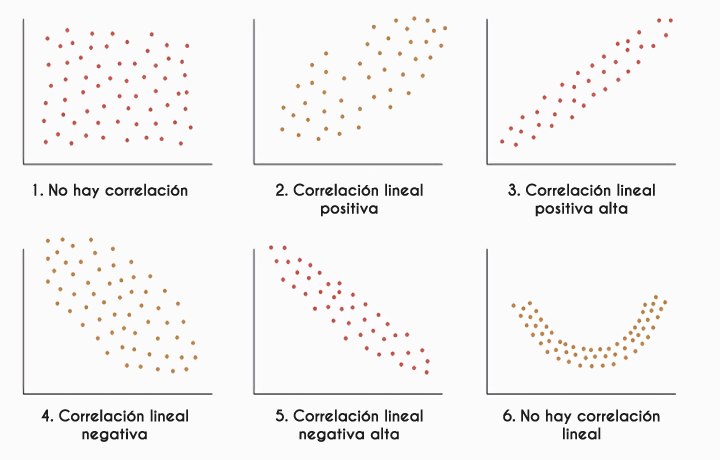

In [ ]:
sns.scatterplot(x="satisfaction_level", y="last_evaluation", data = data) # Seaborn (sns)

In [ ]:
sns.scatterplot(x="satisfaction_level", y="average_montly_hours", data = data)

In [ ]:
sns.scatterplot(x="satisfaction_level", y="average_montly_hours", data = data, hue="left")

In [ ]:
# Análisis correlacional

data.corr() # corr te calcula los valores de coeficiente de correlacion lineal de pearson

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(), annot=True) #heatmap es una grafica de Seaborn que te arma unos cuadrantes de calor para evaluar relaciones de pearson